# I am SUBRAHMANYA SAI BHARADWAJ my twitter identification is sai_gandrakota

## I am going to retrieve data from following twitter accounts

- SrBachchan
- sachin_online
- KTRTRS

In [3]:
import tweepy
import pickle
from twitter_keys import consumer_key, consumer_secret, access_token, access_secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

SrBachchan_tweets = api.user_timeline('SrBachchan')
sachin_online_tweets = api.user_timeline('sachin_online')
KTRTRS_tweets = api.user_timeline('KTRTRS')

with open('SrBachchan.pkl', 'wb') as f:
    pickle.dump(SrBachchan_tweets, f)

with open('sachin_online.pkl', 'wb') as f:
    pickle.dump(sachin_online_tweets, f)

with open('KTRTRS.pkl', 'wb') as f:
    pickle.dump(KTRTRS_tweets, f)

In [4]:
with open ('SrBachchan.pkl', 'rb') as f:
    SrBachchan = pickle.load(f)
    



with open ('sachin_online.pkl', 'rb') as f:
    sachin_online = pickle.load(f)
    



with open ('KTRTRS.pkl', 'rb') as f:
    KTRTRS = pickle.load(f)
    


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\S534596\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


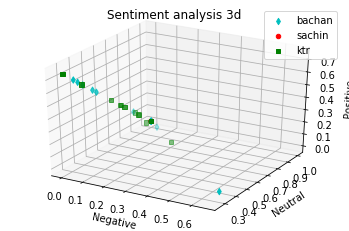

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def get_sentiments(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)



from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#build yor figure
fig = plt.figure()

#build your axis
ax = fig.add_subplot(111, projection = '3d')


SrBachchan_sentiments = [get_sentiments(tweet.text) for tweet in SrBachchan]
sachin_online_sentiments = [get_sentiments(tweet.text) for tweet in sachin_online]
KTRTRS_sentiments = [get_sentiments(tweet.text) for tweet in KTRTRS]

    
xs = [sent['neg'] for sent in SrBachchan_sentiments]
ys = [sent['neu'] for sent in SrBachchan_sentiments]
zs = [sent['pos'] for sent in SrBachchan_sentiments]


sxs = [sent['neg'] for sent in sachin_online_sentiments]
sys = [sent['neu'] for sent in sachin_online_sentiments]
szs = [sent['pos'] for sent in sachin_online_sentiments]



KTRTRSxs = [sent['neg'] for sent in KTRTRS_sentiments]
KTRTRSys = [sent['neu'] for sent in KTRTRS_sentiments]
KTRTRSzs = [sent['pos'] for sent in KTRTRS_sentiments]

ax.scatter(xs, ys,zs,color='c',label='bachan', marker = 'd')
ax.scatter(sxs, sys,szs,color='r',label='sachin', marker = 'o')
ax.scatter(KTRTRSxs, KTRTRSys,KTRTRSzs,color='g',label='ktr',  marker = 's')

ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
ax.set_zlabel('Positive')
plt.title('Sentiment analysis 3d')
ax.legend()
plt.show()


- importing the counter package
- splitting the text(tweet)  and sorting them with reverse as possible
- send the counter method which gives number of occurrance for each word
- adding the title and labels to the graph 
- getting the keys and sorting them
- matching the x axis with range and keys
- using the show function and displaying 

In [47]:
def visualizing_data(data, NUM_VALUES):
    para = data[0].text

    from collections import Counter
    words = para.lower().split()
    word_count = Counter(words)
    import matplotlib.pyplot as plt
    NUM_VALUES = NUM_VALUES
    heights = list(sorted(word_count.values(), reverse=True))
    plt.bar(range(NUM_VALUES),heights[:NUM_VALUES])
    plt.title('word frenquencies')
    plt.ylabel('# Occurences')
    keys = list(word_count.keys())
    keys.sort(key= lambda x: word_count[x], reverse=True)
    plt.xticks(range(NUM_VALUES), keys[:NUM_VALUES])
    plt.show()

### visualizing first tweet of three persons


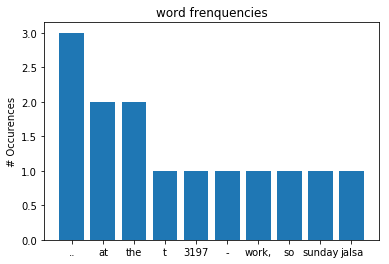

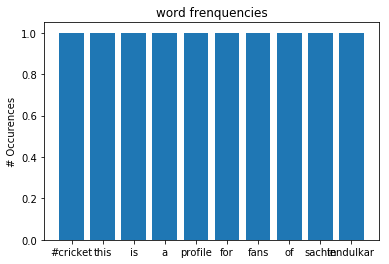

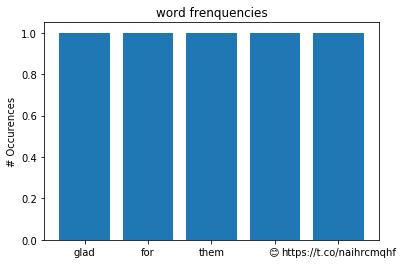

In [49]:
visualizing_data(SrBachchan, 10)
visualizing_data(sachin_online, 10)
visualizing_data(KTRTRS, 5)

### conclusion
with the SentimentIntensityAnalyzer by analyzing the tweets of three people can say that sachin tweets are much neutral while compared to rest two people whose are much more negative, and while visualizing the tweets of them, ktr uses very less words in his tweets than SrBachchan even in some tweets SrBachchan uses less number of words than sachin.